In [16]:
import torch
import numpy
import re
import pandas as pd

from matplotlib import colors as mcolors
from pylab import *
# plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [17]:
# helper function because HC sparsities are messy
def get_avg_sparsity(row):
    sparsity_list = list(map(float, row.model_sparsity.replace('[', '').replace(']', '').split(',')))
    return 1.0*sum(sparsity_list)/len(sparsity_list)

## MNIST

In [18]:
# load all the datafiles you want to plot here

df_weight_train = pd.read_csv("results/results_acc_mnist_training.csv")
df_ep = pd.read_csv("results/results_acc_mnist_ep.csv")
df_hc_noreg = pd.read_csv("results/results_acc_mnist_hc_noreg_adam.csv")
df_hc_reg = pd.read_csv("results/results_acc_mnist_hc_reg_adam.csv")
df_greedy = pd.read_csv("results/plot_data_mnist_greedy.csv")
# rename columns
df_greedy.columns = ['train_acc', 'test_acc', 'epoch', 'model_sparsity']
# df_greedy['sparsity'] = -1
df_pt_hacky = pd.read_csv("results/results_acc_mnist_pt_hacky_adam.csv")
df_pt_noreg = pd.read_csv("results/results_acc_mnist_pt_noreg_adam.csv")
df_pt_reg = pd.read_csv("results/results_acc_mnist_pt_reg_adam.csv")



df_list = [df_weight_train, df_ep, df_hc_noreg, df_hc_reg, df_greedy, df_pt_hacky, df_pt_noreg, df_pt_reg]

df_ep.head() # just to make sure it looks fine

FileNotFoundError: [Errno 2] No such file or directory: 'results/results_acc_mnist_hc_noreg_adam.csv'

In [ ]:
# increasing this makes the curve smoother but less informative
SMOOTHING_WINDOW=10

for df in df_list:
    df['test_acc_smooth'] = df.test_acc
#     df['test_acc_smooth'] = df.test_acc.rolling(window=10, min_periods=1).mean()

KeyError: 'test_acc_smooth'

<Figure size 1440x1872 with 0 Axes>

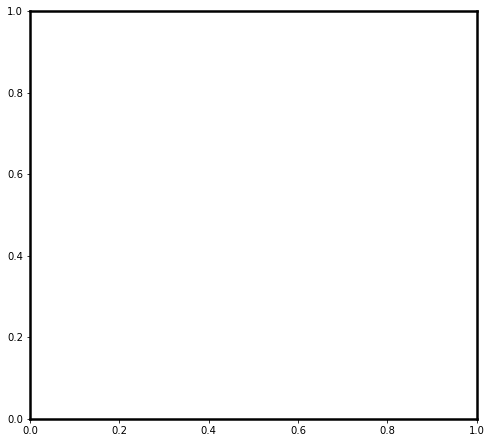

In [19]:
fig = plt.figure(figsize=(20, 26))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 7.5))
ax = plt.subplot(111)
observation_window = 500

# test acc
df_weight_train[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C0", markersize=20, markevery=1,
                              label=r"Weight Training")

df_ep[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C1", markersize=20, markevery=1,
                              label=r"Edge-Popup k=0.5")

df_greedy[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C2", markersize=20, markevery=1,
                              label=r"Greedy Algo")

df_hc_noreg[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C3", markersize=20, markevery=1,
                              label=r"HC (Noreg) Algo")

df_pt_hacky[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C4", markersize=20, markevery=1,
                              label=r"PT Hacky")

df_pt_noreg[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C5", markersize=20, markevery=1,
                              label=r"PT No regularization")

df_pt_reg[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C6", markersize=20, markevery=1,
                              label=r"PT with regularization")

df_hc_reg[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C7", markersize=20, markevery=1,
                              label=r"HC (Reg) Algo")



plt.xlabel("Epoch",fontsize=25)
plt.ylabel("Test Accuracy",fontsize=25)
plt.xticks(size=20, rotation=20)
plt.yticks(size=20)
#plt.ylim(60, 90)
#plt.xlim(-1, 80)
legend_properties = {'size':15}
ax.xaxis.get_offset_text().set_fontsize(15)
ax.xaxis.get_offset_text().set_weight('bold')
#ax.legend(prop=legend_properties)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop=legend_properties)
plt.grid()
plt.tight_layout()
plt.savefig("pruning_acc_comparison_mnist.pdf", format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.05)

KeyError: 'test_acc_smooth'

<Figure size 1440x1872 with 0 Axes>

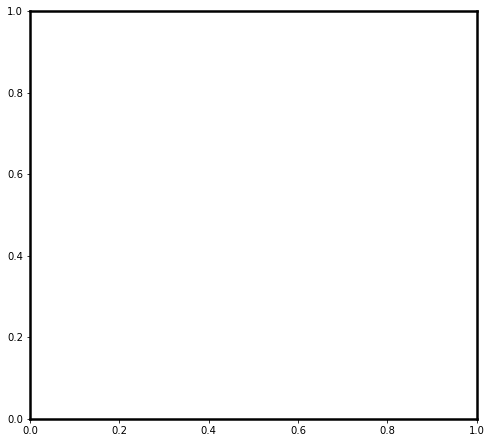

In [20]:
fig = plt.figure(figsize=(20, 26))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 7.5))
ax = plt.subplot(111)
observation_window = 500

# test acc
df_weight_train[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C0", markersize=20, markevery=1,
                              label=r"Weight Training")

df_ep[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C1", markersize=20, markevery=1,
                              label=r"Edge-Popup k=0.5")


df_hc_noreg[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C3", markersize=20, markevery=1,
                              label=r"HC (noreg) Algo")

df_pt_hacky[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C4", markersize=20, markevery=1,
                              label=r"PT Hacky")

df_hc_reg[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C7", markersize=20, markevery=1,
                              label=r"HC (reg) Algo")



plt.xlabel("Epoch",fontsize=25)
plt.ylabel("Test Accuracy",fontsize=25)
plt.xticks(size=20, rotation=20)
plt.yticks(size=20)
#plt.ylim(60, 90)
#plt.xlim(-1, 80)
legend_properties = {'size':15}
ax.xaxis.get_offset_text().set_fontsize(15)
ax.xaxis.get_offset_text().set_weight('bold')
#ax.legend(prop=legend_properties)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop=legend_properties)
plt.grid()
plt.tight_layout()
plt.savefig("pruning_top_acc_comparison_mnist.pdf", format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.05)

NameError: name 'df_greedy' is not defined

<Figure size 1440x1872 with 0 Axes>

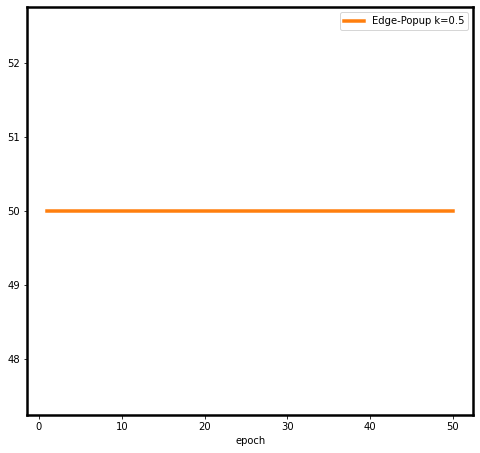

In [21]:
fig = plt.figure(figsize=(20, 26))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 7.5))
ax = plt.subplot(111)
observation_window = 500

# sparsity


df_ep[:observation_window].plot(x='epoch', y='model_sparsity', linestyle='-',
                              ax=ax, linewidth=3.5, color="C1", markersize=20, markevery=1,
                              label=r"Edge-Popup k=0.5")

df_greedy[:observation_window].plot(x='epoch', y='model_sparsity', linestyle='-',
                              ax=ax, linewidth=3.5, color="C2", markersize=20, markevery=1,
                              label=r"Greedy Algo")

df_hc_noreg[:observation_window].plot(x='epoch', y='model_sparsity', linestyle='-',
                              ax=ax, linewidth=3.5, color="C3", markersize=20, markevery=1,
                              label=r"HC (noreg) Algo")


df_pt_hacky[:observation_window].plot(x='epoch', y='model_sparsity', linestyle='-',
                              ax=ax, linewidth=3.5, color="C4", markersize=20, markevery=1,
                              label=r"PT Hacky")

df_pt_noreg[:observation_window].plot(x='epoch', y='model_sparsity', linestyle='-',
                              ax=ax, linewidth=3.5, color="C5", markersize=20, markevery=1,
                              label=r"PT No regularization")

df_pt_reg[:observation_window].plot(x='epoch', y='model_sparsity', linestyle='-',
                              ax=ax, linewidth=3.5, color="C6", markersize=20, markevery=1,
                              label=r"PT with regularization")


df_hc_reg[:observation_window].plot(x='epoch', y='model_sparsity', linestyle='-',
                              ax=ax, linewidth=3.5, color="C7", markersize=20, markevery=1,
                              label=r"HC (reg) Algo")



plt.xlabel("Epoch",fontsize=25)
plt.ylabel("Sparsity (% of non-zero weights)",fontsize=25)
plt.xticks(size=20, rotation=20)
plt.yticks(size=20)
#plt.ylim(60, 90)
#plt.xlim(-1, 80)
legend_properties = {'size':15}
ax.xaxis.get_offset_text().set_fontsize(15)
ax.xaxis.get_offset_text().set_weight('bold')
#ax.legend(prop=legend_properties)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop=legend_properties)
plt.grid()
plt.tight_layout()
plt.savefig("pruning_sparsity_comparison_mnist.pdf", format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.05)

## CIFAR10, ResNet18 Experiments

In [2]:
import torch
import numpy
import re
import pandas as pd

from matplotlib import colors as mcolors
from pylab import *
# plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [3]:
# helper function because HC sparsities are messy
def get_avg_sparsity(row):
    sparsity_list = list(map(float, row.model_sparsity.replace('[', '').replace(']', '').split(',')))
    return 1.0*sum(sparsity_list)/len(sparsity_list)

In [10]:
# load all the datafiles you want to plot here
root = "plots_and_results_arxiv/"
root_over = root + "overparameterized/"
filename = "/acc_and_sparsity.csv"

#df_weight_train = pd.read_csv("results/results_acc_weight_training_CIFAR10_training.csv")
#df_weight_train.columns = ["epoch", "test_acc", "sparsity"]

df_hc_reg_1e2 = pd.read_csv(root + "results_pruning_CIFAR10_cResNet18_hc_reg_var_red_2_0_01_adam_multistep_lr_0_01_0_5_30_fan_False_signed_constant_unif_width_1_0_seed_42" + filename)
df_hc_reg_1e4 = pd.read_csv(root + "results_pruning_CIFAR10_cResNet18_hc_reg_var_red_2_0_0001_adam_multistep_lr_0_01_0_5_30_fan_False_signed_constant_unif_width_1_0_seed_42" + filename)
df_hc_reg_1e6 = pd.read_csv(root + "results_pruning_CIFAR10_cResNet18_hc_reg_var_red_2_1e-06_adam_multistep_lr_0_01_0_5_30_fan_False_signed_constant_unif_width_1_0_seed_42" + filename)


df_list = [df_hc_reg_1e2, df_hc_reg_1e4, df_hc_reg_1e6]
           

df_hc_reg_1e4.tail() # just to make sure it looks fine


,epoch,test_acc_before_rounding,test_acc,regularization_loss,model_sparsity
145,145,93.64,83.97,0.025686,50.270172
146,146,93.66,85.33,0.025975,50.270423
147,147,93.89,84.27,0.024609,50.270934
148,148,94.01,85.51,0.024284,50.270871
149,149,93.64,84.50,0.024033,50.270611


<Figure size 1440x1872 with 0 Axes>

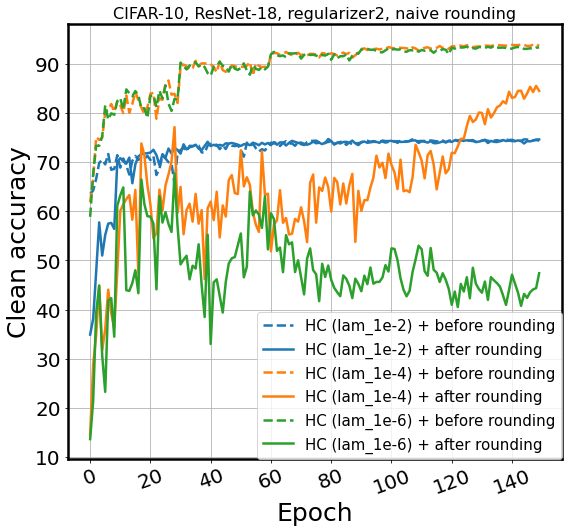

In [16]:
fig = plt.figure(figsize=(20, 26))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 7.5))
ax = plt.subplot(111)
observation_window = 500


#### HC: Adam, multi-step decay
df_hc_reg_1e2[:observation_window].plot(x='epoch', y='test_acc_before_rounding', linestyle='--',
                              ax=ax, linewidth=2.5, color="C0", markersize=20, markevery=1,
                              label=r"HC (lam_1e-2) + before rounding") #, reg2, multistep decay
df_hc_reg_1e2[:observation_window].plot(x='epoch', y='test_acc', linestyle='-',
                              ax=ax, linewidth=2.5, color="C0", markersize=20, markevery=1,
                              label=r"HC (lam_1e-2) + after rounding")
df_hc_reg_1e4[:observation_window].plot(x='epoch', y='test_acc_before_rounding', linestyle='--',
                              ax=ax, linewidth=2.5, color="C1", markersize=20, markevery=1,
                              label=r"HC (lam_1e-4) + before rounding")
df_hc_reg_1e4[:observation_window].plot(x='epoch', y='test_acc', linestyle='-',
                              ax=ax, linewidth=2.5, color="C1", markersize=20, markevery=1,
                              label=r"HC (lam_1e-4) + after rounding")
df_hc_reg_1e6[:observation_window].plot(x='epoch', y='test_acc_before_rounding', linestyle='--',
                              ax=ax, linewidth=2.5, color="C2", markersize=20, markevery=1,
                              label=r"HC (lam_1e-6) + before rounding")
df_hc_reg_1e6[:observation_window].plot(x='epoch', y='test_acc', linestyle='-',
                              ax=ax, linewidth=2.5, color="C2", markersize=20, markevery=1,
                              label=r"HC (lam_1e-6) + after rounding")






plt.title('CIFAR-10, ResNet-18, regularizer2, naive rounding', fontsize=16) #(best optimizer for each scheme) #(when EP uses cosine lr decay)
plt.xlabel("Epoch",fontsize=25)
plt.ylabel("Clean accuracy",fontsize=25)
plt.xticks(size=20, rotation=20)
plt.yticks(size=20)
#plt.ylim(70, 90)
#plt.xlim(-1, 80)
legend_properties = {'size':15}
ax.xaxis.get_offset_text().set_fontsize(15)
ax.xaxis.get_offset_text().set_weight('bold')
#ax.legend(prop=legend_properties)
#ax.legend(bbox_to_anchor=(0., 1.12, 1.0, .102), loc='lower left',
#           ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
# ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
#            ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
ax.legend(bbox_to_anchor=(0, 0, 1, 1), loc='lower right', borderaxespad=0., prop=legend_properties)
plt.grid()
plt.tight_layout()
plt.savefig("CIFAR_10_ResNet_18.pdf", format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.05)



## CIFAR10, Conv4 Experiments

In [243]:
# load all the datafiles you want to plot here

df_weight_train = pd.read_csv("results/results_acc_weight_training_CIFAR10_training.csv")
df_weight_train.columns = ["epoch", "test_acc", "sparsity"]
#df_ep = pd.read_csv("results/results_acc_pruning_CIFAR10_ep_sgd.csv")
#df_ep2 = pd.read_csv("results/results_acc_pruning_CIFAR10_ep_sgd_105.csv")
df_ep3 = pd.read_csv("results_arxiv/results_acc_pruning_CIFAR10_ep_85_43.csv")

#df_hc = pd.read_csv("results/results_acc_pruning_CIFAR10_hc.csv")
#df_hc = pd.read_csv("results_arxiv/results_acc_pruning_CIFAR10_hc_85_88.csv")
#df_hc_reg = pd.read_csv("results_arxiv/results_acc_pruning_CIFAR10_hc_reg_85_97.csv")
df_hc_reg = pd.read_csv("results_arxiv/results_acc_pruning_CIFAR10_hc_reg_adam_no_decay.csv")
#df_hc_reg_multistep = pd.read_csv("results_arxiv/results_acc_pruning_CIFAR10_hc_reg_adam_multistep_decay_0.01_50_0.1.csv")


#df_hc_prob = pd.read_csv("results_arxiv/results_acc_pruning_CIFAR10_hc_noreg_adam.csv")
#df_hc_prob_reg = pd.read_csv("results_arxiv/results_acc_pruning_CIFAR10_hc_reg_adam.csv")

root = "plots_and_results_arxiv/"
root_over = root + "overparameterized/"
filename = "/acc_and_sparsity.csv"

df_ep_cosine = pd.read_csv(root + "histogram_and_csv_pruning_CIFAR10_ep_None_0_001_sgd_cosine_lr_0_1_0_1_50_fan_True_signed_constant_unif_width_1_0_seed_42" + filename)
df_ep_overparam_1_5_cosine = pd.read_csv(root + "histogram_and_csv_pruning_CIFAR10_ep_None_0_001_sgd_cosine_lr_0_1_0_1_50_fan_True_signed_constant_unif_width_1_5_seed_42" + filename)
df_ep_overparam_2_cosine = pd.read_csv(root + "histogram_and_csv_pruning_CIFAR10_ep_None_0_001_sgd_cosine_lr_0_1_0_1_50_fan_True_signed_constant_unif_width_2_0_seed_42" + filename)


df_ep4 = pd.read_csv(root + "histogram_and_csv_pruning_CIFAR10_ep_None_0_001_sgd_multistep_lr_0_1_0_5_20_fan_True_signed_constant_unif_seed_42" + filename)
df_ep_adam = pd.read_csv(root + "histogram_and_csv_pruning_CIFAR10_ep_None_0_001_adam_multistep_lr_0_0001_0_5_20_fan_True_signed_constant_unif_seed_42" + filename)
#df_ep_overparam_1_5 = pd.read_csv(root_over + "histogram_and_csv_pruning_CIFAR10_ep_None_0_001_adam_multistep_lr_0_0001_0_5_20_fan_True_signed_constant_unif_width_1_5_seed_42" + filename )
#df_ep_overparam_2 = pd.read_csv(root_over + "histogram_and_csv_pruning_CIFAR10_ep_None_0_001_adam_multistep_lr_0_0001_0_5_20_fan_True_signed_constant_unif_width_2_0_seed_42" + filename )
df_ep_overparam_1_5_sgd = pd.read_csv(root_over + "histogram_and_csv_pruning_CIFAR10_ep_None_0_001_sgd_multistep_lr_0_1_0_5_20_fan_True_signed_constant_unif_width_1_5_seed_42" + filename )
df_ep_overparam_2_sgd = pd.read_csv(root_over + "histogram_and_csv_pruning_CIFAR10_ep_None_0_001_sgd_multistep_lr_0_1_0_5_20_fan_True_signed_constant_unif_width_2_0_seed_42" + filename )
df_ep_overparam_2_sgd2 = pd.read_csv(root_over +"histogram_and_csv_pruning_CIFAR10_ep_None_0_001_sgd_multistep_lr_0_15_0_5_20_fan_True_signed_constant_unif_width_2_0_seed_42" + filename)




df_hc_multistep_lam_0 = pd.read_csv(root + "histogram_and_csv_pruning_CIFAR10_hc_None_0.001_adam_multistep_lr_0.01_0.5_30_seed_42" + filename)
#df_hc_multistep_lam_1e6 = pd.read_csv("results_arxiv/results_acc_pruning_CIFAR10_hc_reg_adam_multistep_decay_0.01_30_0.5_0.00001.csv")
df_hc_multistep_lam_1e6 = pd.read_csv(root + "histogram_and_csv_pruning_CIFAR10_hc_var_red_1_1e-06_adam_multistep_lr_0.01_0.5_30_seed_42" + filename)
df_hc_multistep_lam_1e7 = pd.read_csv(root + "histogram_and_csv_pruning_CIFAR10_hc_var_red_1_1e-07_adam_multistep_lr_0.01_0.5_30_seed_42" + filename)
df_hc_multistep_lam_1e9 = pd.read_csv(root + "histogram_and_csv_pruning_CIFAR10_hc_var_red_1_1e-09_adam_multistep_lr_0.01_0.5_30_seed_42" + filename)

df_hc_multistep_reg2 = pd.read_csv(root + "histogram_and_csv_pruning_CIFAR10_hc_var_red_2_1e-05_adam_multistep_lr_0_01_0_5_30_fan_False_signed_constant_unif_seed_42" + filename)
df_hc_overparam_1_5 = pd.read_csv(root_over + "histogram_and_csv_pruning_CIFAR10_hc_var_red_2_1e-07_adam_multistep_lr_0_01_0_5_30_fan_False_signed_constant_bern_seed_42_overparam_1_5" + filename)
df_hc_overparam_2 = pd.read_csv(root_over + "histogram_and_csv_pruning_CIFAR10_hc_var_red_2_1e-07_adam_multistep_lr_0_01_0_5_30_fan_False_signed_constant_bern_seed_42_overparam_2" + filename)

df_hc_cosine_1 = pd.read_csv(root + "histogram_and_csv_pruning_CIFAR10_hc_var_red_2_1e-07_adam_cosine_lr_0_01_0_1_50_fan_False_signed_constant_bern_width_1_seed_42" + filename)
df_hc_cosine_1_5 = pd.read_csv(root + "histogram_and_csv_pruning_CIFAR10_hc_var_red_2_1e-07_adam_cosine_lr_0_01_0_1_50_fan_False_signed_constant_bern_width_1_5_seed_42" + filename)
df_hc_cosine_2 = pd.read_csv(root + "histogram_and_csv_pruning_CIFAR10_hc_var_red_2_1e-07_adam_cosine_lr_0_01_0_1_50_fan_False_signed_constant_bern_width_2_0_seed_42" + filename)

df_hc_cosine_2_lam_1e4 = pd.read_csv(root + "histogram_and_csv_pruning_CIFAR10_hc_var_red_2_0_0001_adam_cosine_lr_0_01_0_1_50_fan_False_signed_constant_unif_width_2_0_seed_42" + filename)
df_hc_cosine_2_lam_1e4_300epoch = pd.read_csv(root + "histogram_and_csv_pruning_CIFAR10_hc_var_red_2_0_0001_adam_cosine_lr_0_01_0_1_50_fan_False_signed_constant_unif_width_2_0_seed_42_300epochs" + filename)


df_list = [df_weight_train, 
           df_hc_multistep_lam_0, df_hc_multistep_lam_1e6, df_hc_multistep_lam_1e7, df_hc_multistep_lam_1e9, 
           df_hc_multistep_reg2, df_ep_overparam_1_5, df_ep_overparam_2,
           df_hc_overparam_1_5, df_hc_overparam_2,
           df_ep_adam, df_ep3, df_ep4, df_ep_cosine,
          df_hc_cosine_1, df_hc_cosine_1_5, df_hc_cosine_2,
          df_hc_cosine_2_lam_1e4, df_hc_cosine_2_lam_1e4_300epoch]
           

df_ep.head() # just to make sure it looks fine


,epoch,test_acc,model_sparsity
0,1,97.08,50.0
1,2,97.79,50.0
2,3,97.40,50.0
3,4,97.07,50.0
4,5,96.65,50.0


In [244]:
df_list

[     epoch  test_acc  sparsity
 0        0     53.03        -1
 1        1     64.89        -1
 2        2     70.67        -1
 3        3     72.74        -1
 4        4     74.59        -1
 ..     ...       ...       ...
 145    145     87.09        -1
 146    146     86.70        -1
 147    147     86.60        -1
 148    148     86.86        -1
 149    149     86.98        -1
 
 [150 rows x 3 columns],
      epoch  test_acc_before_rounding  test_acc  model_sparsity
 0        0                     51.03     25.49       50.016660
 1        1                     56.73     46.01       50.065484
 2        2                     64.35     56.88       50.092700
 3        3                     67.21     60.91       50.092659
 4        4                     69.98     68.43       50.108081
 ..     ...                       ...       ...             ...
 145    145                     86.18     83.36       48.064349
 146    146                     85.79     83.34       48.057957
 147    147  

In [224]:
#(df_hc_overparam_2['test_acc']>=87.5)[40:80] # (df_ep_overparam_2_cosine['test_acc']>=87.5)[110:]

<Figure size 1440x1872 with 0 Axes>

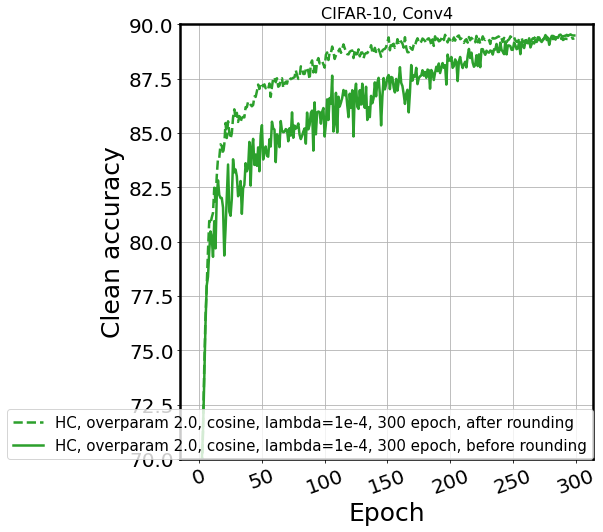

In [248]:
fig = plt.figure(figsize=(20, 26))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 7.5))
ax = plt.subplot(111)
observation_window = 500


#### HC: Adam, cosine learning rate decay

df_hc_cosine_2_lam_1e4_300epoch[:observation_window].plot(x='epoch', y='test_acc', linestyle='--',
                              ax=ax, linewidth=2.5, color="C2", markersize=20, markevery=1,
                              #label=r"HC (reg2, lam_1e-5, multistep decay) + naive rounding"
                              label=r"HC, overparam 2.0, cosine, lambda=1e-4, 300 epoch, after rounding") # + naive rounding")
df_hc_cosine_2_lam_1e4_300epoch[:observation_window].plot(x='epoch', y='test_acc_before_rounding', linestyle='-',
                              ax=ax, linewidth=2.5, color="C2", markersize=20, markevery=1,
                              #label=r"HC (reg2, lam_1e-5, multistep decay) + naive rounding"
                              label=r"HC, overparam 2.0, cosine, lambda=1e-4, 300 epoch, before rounding") # + naive rounding")



plt.title('CIFAR-10, Conv4', fontsize=16) #(best optimizer for each scheme) #(when EP uses cosine lr decay)
plt.xlabel("Epoch",fontsize=25)
plt.ylabel("Clean accuracy",fontsize=25)
plt.xticks(size=20, rotation=20)
plt.yticks(size=20)
plt.ylim(70, 90)
#plt.xlim(-1, 80)
legend_properties = {'size':15}
ax.xaxis.get_offset_text().set_fontsize(15)
ax.xaxis.get_offset_text().set_weight('bold')
#ax.legend(prop=legend_properties)
#ax.legend(bbox_to_anchor=(0., 1.12, 1.0, .102), loc='lower left',
#           ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
# ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
#            ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
ax.legend(bbox_to_anchor=(0, 0, 1, 1), loc='lower right', borderaxespad=0., prop=legend_properties)
plt.grid()
plt.tight_layout()
plt.savefig("cln_acc_300epochs.pdf", format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.05)





<Figure size 1440x1872 with 0 Axes>

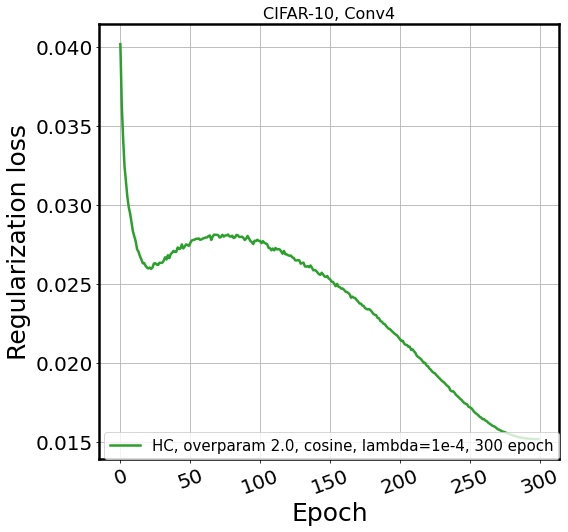

In [245]:
fig = plt.figure(figsize=(20, 26))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 7.5))
ax = plt.subplot(111)
observation_window = 500


#### HC: Adam, cosine learning rate decay

df_hc_cosine_2_lam_1e4_300epoch[:observation_window].plot(x='epoch', y='regularization_loss', linestyle='-',
                              ax=ax, linewidth=2.5, color="C2", markersize=20, markevery=1,
                              #label=r"HC (reg2, lam_1e-5, multistep decay) + naive rounding"
                              label=r"HC, overparam 2.0, cosine, lambda=1e-4, 300 epoch") # + naive rounding")

plt.title('CIFAR-10, Conv4', fontsize=16) #(best optimizer for each scheme) #(when EP uses cosine lr decay)
plt.xlabel("Epoch",fontsize=25)
plt.ylabel("Regularization loss",fontsize=25)
plt.xticks(size=20, rotation=20)
plt.yticks(size=20)
#plt.ylim(70, 90)
#plt.xlim(-1, 80)
legend_properties = {'size':15}
ax.xaxis.get_offset_text().set_fontsize(15)
ax.xaxis.get_offset_text().set_weight('bold')
#ax.legend(prop=legend_properties)
#ax.legend(bbox_to_anchor=(0., 1.12, 1.0, .102), loc='lower left',
#           ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
# ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
#            ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
ax.legend(bbox_to_anchor=(0, 0, 1, 1), loc='lower right', borderaxespad=0., prop=legend_properties)
plt.grid()
plt.tight_layout()
plt.savefig("regularization_loss.pdf", format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.05)





<Figure size 1440x1872 with 0 Axes>

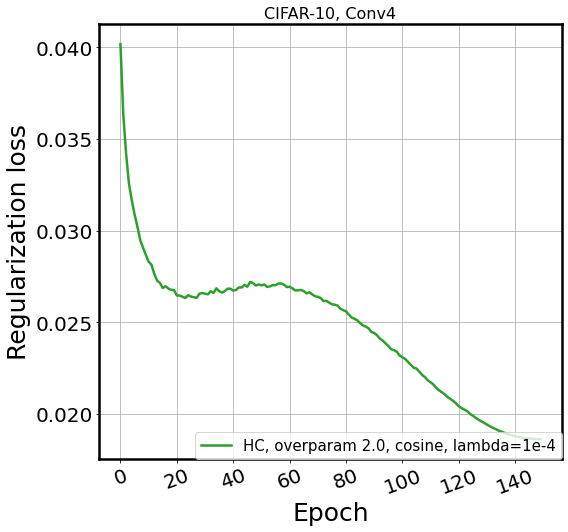

In [241]:
fig = plt.figure(figsize=(20, 26))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 7.5))
ax = plt.subplot(111)
observation_window = 500


#### HC: Adam, cosine learning rate decay

df_hc_cosine_2_lam_1e4[:observation_window].plot(x='epoch', y='regularization_loss', linestyle='-',
                              ax=ax, linewidth=2.5, color="C2", markersize=20, markevery=1,
                              #label=r"HC (reg2, lam_1e-5, multistep decay) + naive rounding"
                              label=r"HC, overparam 2.0, cosine, lambda=1e-4") # + naive rounding")



plt.title('CIFAR-10, Conv4', fontsize=16) #(best optimizer for each scheme) #(when EP uses cosine lr decay)
plt.xlabel("Epoch",fontsize=25)
plt.ylabel("Regularization loss",fontsize=25)
plt.xticks(size=20, rotation=20)
plt.yticks(size=20)
#plt.ylim(70, 90)
#plt.xlim(-1, 80)
legend_properties = {'size':15}
ax.xaxis.get_offset_text().set_fontsize(15)
ax.xaxis.get_offset_text().set_weight('bold')
#ax.legend(prop=legend_properties)
#ax.legend(bbox_to_anchor=(0., 1.12, 1.0, .102), loc='lower left',
#           ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
# ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
#            ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
ax.legend(bbox_to_anchor=(0, 0, 1, 1), loc='lower right', borderaxespad=0., prop=legend_properties)
plt.grid()
plt.tight_layout()
plt.savefig("regularization_loss.pdf", format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.05)




<Figure size 1440x1872 with 0 Axes>

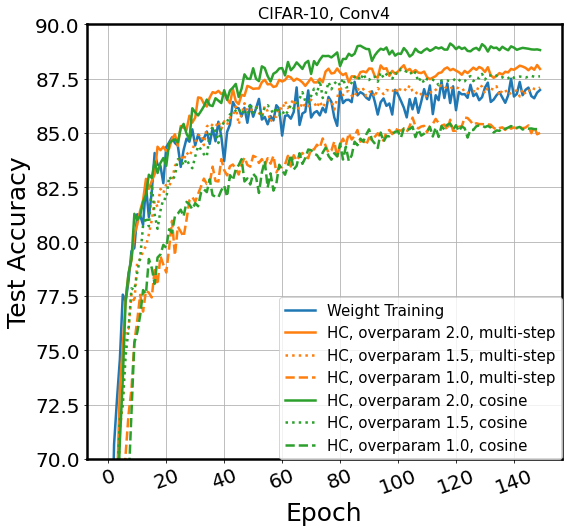

In [229]:
fig = plt.figure(figsize=(20, 26))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 7.5))
ax = plt.subplot(111)
observation_window = 500

#### weight training
df_weight_train[:observation_window].plot(x='epoch', y='test_acc', linestyle='-',
                              ax=ax, linewidth=2.5, color="C0", markersize=20, markevery=1,
                              label=r"Weight Training")

#### HC: Adam, multi-step decay
df_hc_overparam_2[:observation_window].plot(x='epoch', y='test_acc', linestyle='-',
                              ax=ax, linewidth=2.5, color="C1", markersize=20, markevery=1,
                              label=r"HC, overparam 2.0, multi-step") #)+ naive rounding")
df_hc_overparam_1_5[:observation_window].plot(x='epoch', y='test_acc', linestyle='dotted',
                              ax=ax, linewidth=2.5, color="C1", markersize=20, markevery=1,
                              label=r"HC, overparam 1.5, multi-step") #+ naive rounding")

df_hc_multistep_reg2[:observation_window].plot(x='epoch', y='test_acc', linestyle='--',
                              ax=ax, linewidth=2.5, color="C1", markersize=20, markevery=1,
                              #label=r"HC (reg2, lam_1e-5, multistep decay) + naive rounding"
                              label=r"HC, overparam 1.0, multi-step") # + naive rounding")

#### HC: Adam, cosine learning rate decay

df_hc_cosine_2[:observation_window].plot(x='epoch', y='test_acc', linestyle='-',
                              ax=ax, linewidth=2.5, color="C2", markersize=20, markevery=1,
                              #label=r"HC (reg2, lam_1e-5, multistep decay) + naive rounding"
                              label=r"HC, overparam 2.0, cosine") # + naive rounding")

df_hc_cosine_1_5[:observation_window].plot(x='epoch', y='test_acc', linestyle='dotted',
                              ax=ax, linewidth=2.5, color="C2", markersize=20, markevery=1,
                              #label=r"HC (reg2, lam_1e-5, multistep decay) + naive rounding"
                              label=r"HC, overparam 1.5, cosine") # + naive rounding")

df_hc_cosine_1[:observation_window].plot(x='epoch', y='test_acc', linestyle='--',
                              ax=ax, linewidth=2.5, color="C2", markersize=20, markevery=1,
                              #label=r"HC (reg2, lam_1e-5, multistep decay) + naive rounding"
                              label=r"HC, overparam 1.0, cosine") # + naive rounding")




#### EP: SGD, cosine learning rate decay
# df_ep_overparam_2_cosine[:observation_window].plot(x='epoch', y='test_acc', linestyle='-',
#                               ax=ax, linewidth=2.5, color="C4", markersize=20, markevery=1,
#                               label=r"EP (k=0.5), overparam 2.0, cosine")#, sgd")


# df_ep_overparam_1_5_cosine[:observation_window].plot(x='epoch', y='test_acc', linestyle='dotted',
#                               ax=ax, linewidth=2.5, color="C4", markersize=20, markevery=1,
#                               label=r"EP (k=0.5), overparam 1.5, cosine")#, sgd")

# df_ep_cosine[:observation_window].plot(x='epoch', y='test_acc', linestyle='--',
#                               ax=ax, linewidth=2.5, color="C4", markersize=20, markevery=1,
#                               label=r"EP (k=0.5), overparam 1.0, cosine")#, sgd")


plt.title('CIFAR-10, Conv4', fontsize=16) #(best optimizer for each scheme) #(when EP uses cosine lr decay)
plt.xlabel("Epoch",fontsize=25)
plt.ylabel("Test Accuracy",fontsize=25)
plt.xticks(size=20, rotation=20)
plt.yticks(size=20)
plt.ylim(70, 90)
#plt.xlim(-1, 80)
legend_properties = {'size':15}
ax.xaxis.get_offset_text().set_fontsize(15)
ax.xaxis.get_offset_text().set_weight('bold')
#ax.legend(prop=legend_properties)
#ax.legend(bbox_to_anchor=(0., 1.12, 1.0, .102), loc='lower left',
#           ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
# ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
#            ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
ax.legend(bbox_to_anchor=(0, 0, 1, 1), loc='lower right', borderaxespad=0., prop=legend_properties)
plt.grid()
plt.tight_layout()
plt.savefig("pruning_acc_comparison_cifar10.pdf", format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.05)



<Figure size 1440x1872 with 0 Axes>

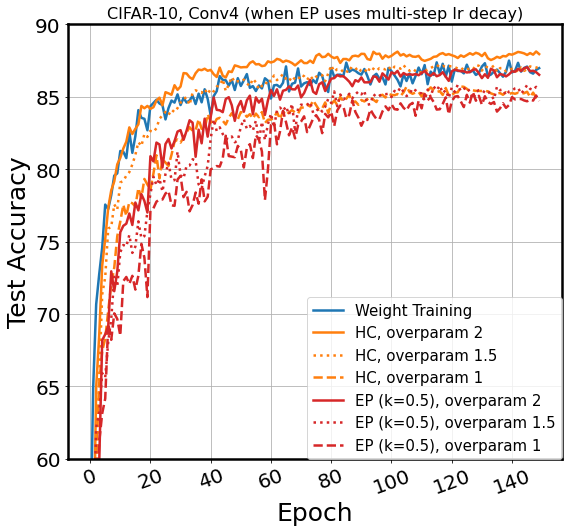

In [211]:
fig = plt.figure(figsize=(20, 26))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 7.5))
ax = plt.subplot(111)
observation_window = 500

#### weight training
df_weight_train[:observation_window].plot(x='epoch', y='test_acc', linestyle='-',
                              ax=ax, linewidth=2.5, color="C0", markersize=20, markevery=1,
                              label=r"Weight Training")

#### HC: Adam, multi-step decay
df_hc_overparam_2[:observation_window].plot(x='epoch', y='test_acc', linestyle='-',
                              ax=ax, linewidth=2.5, color="C1", markersize=20, markevery=1,
                              label=r"HC, overparam 2") #)+ naive rounding")
df_hc_overparam_1_5[:observation_window].plot(x='epoch', y='test_acc', linestyle='dotted',
                              ax=ax, linewidth=2.5, color="C1", markersize=20, markevery=1,
                              label=r"HC, overparam 1.5") #+ naive rounding")

df_hc_multistep_reg2[:observation_window].plot(x='epoch', y='test_acc', linestyle='--',
                              ax=ax, linewidth=2.5, color="C1", markersize=20, markevery=1,
                              #label=r"HC (reg2, lam_1e-5, multistep decay) + naive rounding"
                              label=r"HC, overparam 1") # + naive rounding")

#### EP: SGD, multi-step decay
df_ep_overparam_2_sgd[:observation_window].plot(x='epoch', y='test_acc', linestyle='-',
                              ax=ax, linewidth=2.5, color="C3", markersize=20, markevery=1,
                              label=r"EP (k=0.5), overparam 2")#, sgd") #, multistep decay") #, adam")
# df_ep_overparam_2_sgd2[:observation_window].plot(x='epoch', y='test_acc', linestyle='-',
#                               ax=ax, linewidth=2.5, color="C4", markersize=20, markevery=1,
#                               label=r"EP (k=0.5), overparam 2, lr=0.15")#, sgd") #, multistep decay") #, adam")
df_ep_overparam_1_5_sgd[:observation_window].plot(x='epoch', y='test_acc', linestyle='dotted',
                              ax=ax, linewidth=2.5, color="C3", markersize=20, markevery=1,
                              label=r"EP (k=0.5), overparam 1.5")#, sgd") #, multistep decay") #, adam")
df_ep4[:observation_window].plot(x='epoch', y='test_acc', linestyle='--',
                              ax=ax, linewidth=2.5, color="C3", markersize=20, markevery=1,
                              label=r"EP (k=0.5), overparam 1")#, sgd")



plt.title('CIFAR-10, Conv4 (when EP uses multi-step lr decay)', fontsize=16) #(best optimizer for each scheme)
plt.xlabel("Epoch",fontsize=25)
plt.ylabel("Test Accuracy",fontsize=25)
plt.xticks(size=20, rotation=20)
plt.yticks(size=20)
plt.ylim(60, 90)
#plt.xlim(-1, 80)
legend_properties = {'size':15}
ax.xaxis.get_offset_text().set_fontsize(15)
ax.xaxis.get_offset_text().set_weight('bold')
#ax.legend(prop=legend_properties)
#ax.legend(bbox_to_anchor=(0., 1.12, 1.0, .102), loc='lower left',
#           ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
# ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
#            ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
ax.legend(bbox_to_anchor=(0, 0, 1, 1), loc='lower right', borderaxespad=0., prop=legend_properties)
plt.grid()
plt.tight_layout()
plt.savefig("pruning_acc_comparison_cifar10.pdf", format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.05)



<Figure size 1440x1872 with 0 Axes>

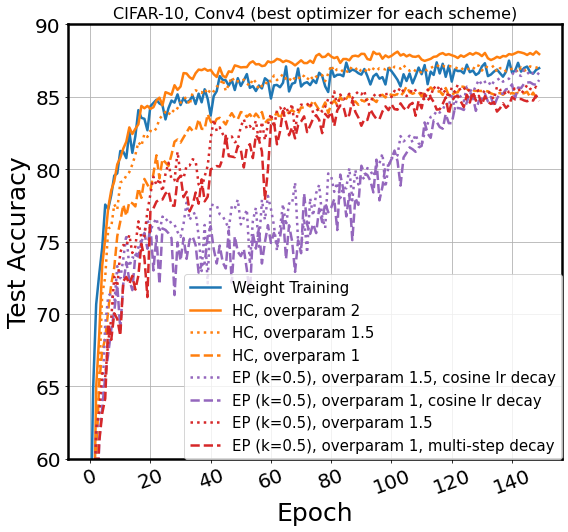

In [173]:
fig = plt.figure(figsize=(20, 26))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 7.5))
ax = plt.subplot(111)
observation_window = 500

# test acc
df_weight_train[:observation_window].plot(x='epoch', y='test_acc', linestyle='-',
                              ax=ax, linewidth=2.5, color="C0", markersize=20, markevery=1,
                              label=r"Weight Training")
df_hc_overparam_2[:observation_window].plot(x='epoch', y='test_acc', linestyle='-',
                              ax=ax, linewidth=2.5, color="C1", markersize=20, markevery=1,
                              label=r"HC, overparam 2") #)+ naive rounding")
df_hc_overparam_1_5[:observation_window].plot(x='epoch', y='test_acc', linestyle='dotted',
                              ax=ax, linewidth=2.5, color="C1", markersize=20, markevery=1,
                              label=r"HC, overparam 1.5") #+ naive rounding")





# df_hc_reg[:observation_window].plot(x='epoch', y='test_acc_before_rounding', linestyle='-',
#                               ax=ax, linewidth=3.5, color="C1", markersize=20, markevery=1,
#                               label=r"HC (reg, no decay) + no rounding")

# df_hc_reg[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
#                               ax=ax, linewidth=3.5, color="C2", markersize=20, markevery=1,
#                               label=r"HC (reg, no decay) + naive rounding")

# df_hc_reg_multistep[:observation_window].plot(x='epoch', y='test_acc_before_rounding', linestyle='-',
#                               ax=ax, linewidth=3.5, color="C3", markersize=20, markevery=1,
#                               label=r"HC (reg, multistep decay) + no rounding")

# df_hc_reg_multistep[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
#                               ax=ax, linewidth=3.5, color="C4", markersize=20, markevery=1,
#                               label=r"HC (reg, multistep decay) + naive rounding")


# df_hc_multistep_lam_1e7[:observation_window].plot(x='epoch', y='test_acc', linestyle='-',
#                               ax=ax, linewidth=3.5, color="C3", markersize=20, markevery=1,
#                               label=r"HC (reg1, lam_1e-7, multistep decay) + naive rounding")
df_hc_multistep_reg2[:observation_window].plot(x='epoch', y='test_acc', linestyle='--',
                              ax=ax, linewidth=2.5, color="C1", markersize=20, markevery=1,
                              #label=r"HC (reg2, lam_1e-5, multistep decay) + naive rounding"
                              label=r"HC, overparam 1") # + naive rounding")

#### SGD, cosine learning rate decay
df_ep_overparam_1_5_cosine[:observation_window].plot(x='epoch', y='test_acc', linestyle='dotted',
                              ax=ax, linewidth=2.5, color="C4", markersize=20, markevery=1,
                              label=r"EP (k=0.5), overparam 1.5, cosine lr decay")#, sgd")

df_ep_cosine[:observation_window].plot(x='epoch', y='test_acc', linestyle='--',
                              ax=ax, linewidth=2.5, color="C4", markersize=20, markevery=1,
                              label=r"EP (k=0.5), overparam 1, cosine lr decay")#, sgd")




#### SGD

# df_ep3[:observation_window].plot(x='epoch', y='test_acc', linestyle='-',
#                               ax=ax, linewidth=3.5, color="C1", markersize=20, markevery=1,
#                               label=r"Edge-Popup k=0.5, cosine lr decay")

# df_ep_overparam_2_sgd[:observation_window].plot(x='epoch', y='test_acc', linestyle='-',
#                               ax=ax, linewidth=2.5, color="C3", markersize=20, markevery=1,
#                               label=r"EP (k=0.5), overparam 2")#, sgd") #, multistep decay") #, adam")
df_ep_overparam_1_5_sgd[:observation_window].plot(x='epoch', y='test_acc', linestyle='dotted',
                              ax=ax, linewidth=2.5, color="C3", markersize=20, markevery=1,
                              label=r"EP (k=0.5), overparam 1.5")#, sgd") #, multistep decay") #, adam")
df_ep4[:observation_window].plot(x='epoch', y='test_acc', linestyle='--',
                              ax=ax, linewidth=2.5, color="C3", markersize=20, markevery=1,
                              label=r"EP (k=0.5), overparam 1, multi-step decay")#, sgd")


#### ADAM

# df_ep_overparam_2[:observation_window].plot(x='epoch', y='test_acc', linestyle='-',
#                               ax=ax, linewidth=2.5, color="C3", markersize=20, markevery=1,
#                               label=r"Edge-Popup k=0.5, overparam 2") #, multistep decay") #, adam")


# df_ep_overparam_1_5[:observation_window].plot(x='epoch', y='test_acc', linestyle='dotted',
#                               ax=ax, linewidth=2.5, color="C3", markersize=20, markevery=1,
#                               label=r"Edge-Popup k=0.5, overparam 1.5") #, multistep decay") #, adam")


# df_ep_adam[:observation_window].plot(x='epoch', y='test_acc', linestyle='--',
#                                      ax=ax, linewidth=2.5, color="C3", markersize=20, markevery=1,
#                                      label=r"Edge-Popup k=0.5") #, multistep decay") #, adam")



plt.title('CIFAR-10, Conv4 (best optimizer for each scheme)', fontsize=16)
plt.xlabel("Epoch",fontsize=25)
plt.ylabel("Test Accuracy",fontsize=25)
plt.xticks(size=20, rotation=20)
plt.yticks(size=20)
plt.ylim(60, 90)
#plt.xlim(-1, 80)
legend_properties = {'size':15}
ax.xaxis.get_offset_text().set_fontsize(15)
ax.xaxis.get_offset_text().set_weight('bold')
#ax.legend(prop=legend_properties)
#ax.legend(bbox_to_anchor=(0., 1.12, 1.0, .102), loc='lower left',
#           ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
# ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
#            ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
ax.legend(bbox_to_anchor=(0, 0, 1, 1), loc='lower right', borderaxespad=0., prop=legend_properties)
plt.grid()
plt.tight_layout()
plt.savefig("pruning_acc_comparison_cifar10.pdf", format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.05)


<Figure size 1440x1872 with 0 Axes>

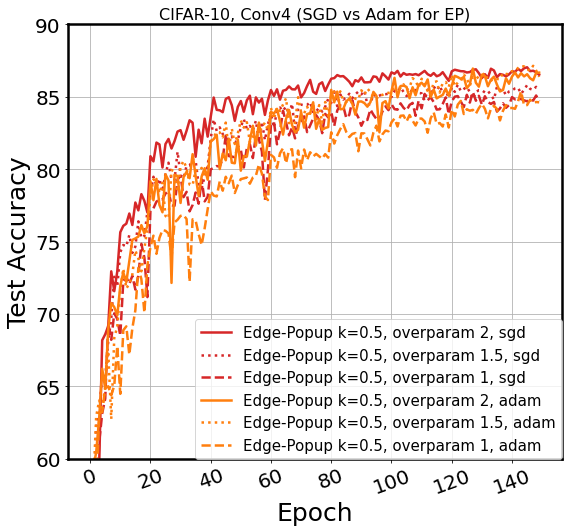

In [146]:
fig = plt.figure(figsize=(20, 26))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 7.5))
ax = plt.subplot(111)
observation_window = 500


#### SGD

df_ep_overparam_2_sgd[:observation_window].plot(x='epoch', y='test_acc', linestyle='-',
                              ax=ax, linewidth=2.5, color="C3", markersize=20, markevery=1,
                              label=r"Edge-Popup k=0.5, overparam 2, sgd") #, multistep decay") #, adam")

df_ep_overparam_1_5_sgd[:observation_window].plot(x='epoch', y='test_acc', linestyle='dotted',
                              ax=ax, linewidth=2.5, color="C3", markersize=20, markevery=1,
                              label=r"Edge-Popup k=0.5, overparam 1.5, sgd") #, multistep decay") #, adam")
df_ep4[:observation_window].plot(x='epoch', y='test_acc', linestyle='--',
                              ax=ax, linewidth=2.5, color="C3", markersize=20, markevery=1,
                              label=r"Edge-Popup k=0.5, overparam 1, sgd")


#### ADAM

df_ep_overparam_2[:observation_window].plot(x='epoch', y='test_acc', linestyle='-',
                              ax=ax, linewidth=2.5, color="C1", markersize=20, markevery=1,
                              label=r"Edge-Popup k=0.5, overparam 2, adam") #, multistep decay") #, adam")


df_ep_overparam_1_5[:observation_window].plot(x='epoch', y='test_acc', linestyle='dotted',
                              ax=ax, linewidth=2.5, color="C1", markersize=20, markevery=1,
                              label=r"Edge-Popup k=0.5, overparam 1.5, adam") #, multistep decay") #, adam")


df_ep_adam[:observation_window].plot(x='epoch', y='test_acc', linestyle='--',
                                     ax=ax, linewidth=2.5, color="C1", markersize=20, markevery=1,
                                     label=r"Edge-Popup k=0.5, overparam 1, adam") #, multistep decay") #, adam")



plt.title('CIFAR-10, Conv4 (SGD vs Adam for EP)', fontsize=16)
plt.xlabel("Epoch",fontsize=25)
plt.ylabel("Test Accuracy",fontsize=25)
plt.xticks(size=20, rotation=20)
plt.yticks(size=20)
plt.ylim(60, 90)
#plt.xlim(-1, 80)
legend_properties = {'size':15}
ax.xaxis.get_offset_text().set_fontsize(15)
ax.xaxis.get_offset_text().set_weight('bold')
#ax.legend(prop=legend_properties)
#ax.legend(bbox_to_anchor=(0., 1.12, 1.0, .102), loc='lower left',
#           ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
# ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
#            ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
ax.legend(bbox_to_anchor=(0, 0, 1, 1), loc='lower right', borderaxespad=0., prop=legend_properties)
plt.grid()
plt.tight_layout()
plt.savefig("pruning_acc_comparison_cifar10.pdf", format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.05)



<Figure size 1440x1872 with 0 Axes>

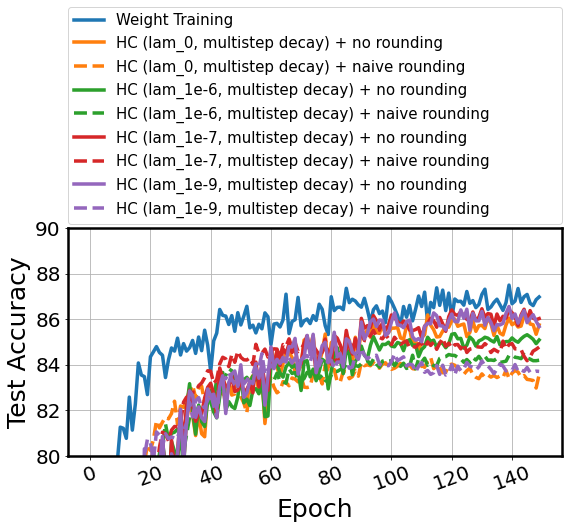

In [84]:
fig = plt.figure(figsize=(20, 26))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 7.5))
ax = plt.subplot(111)
observation_window = 500

# test acc
df_weight_train[:observation_window].plot(x='epoch', y='test_acc', linestyle='-',
                              ax=ax, linewidth=3.5, color="C0", markersize=20, markevery=1,
                              label=r"Weight Training")

# df_hc_reg[:observation_window].plot(x='epoch', y='test_acc_before_rounding', linestyle='-',
#                               ax=ax, linewidth=3.5, color="C1", markersize=20, markevery=1,
#                               label=r"HC (reg, no decay) + no rounding")

# df_hc_reg[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
#                               ax=ax, linewidth=3.5, color="C2", markersize=20, markevery=1,
#                               label=r"HC (reg, no decay) + naive rounding")

# df_hc_reg_multistep[:observation_window].plot(x='epoch', y='test_acc_before_rounding', linestyle='-',
#                               ax=ax, linewidth=3.5, color="C3", markersize=20, markevery=1,
#                               label=r"HC (reg, multistep decay) + no rounding")

# df_hc_reg_multistep[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
#                               ax=ax, linewidth=3.5, color="C4", markersize=20, markevery=1,
#                               label=r"HC (reg, multistep decay) + naive rounding")

df_hc_multistep_lam_0[:observation_window].plot(x='epoch', y='test_acc_before_rounding', linestyle='-',
                              ax=ax, linewidth=3.5, color="C1", markersize=20, markevery=1,
                              label=r"HC (lam_0, multistep decay) + no rounding")
df_hc_multistep_lam_0[:observation_window].plot(x='epoch', y='test_acc', linestyle='--',
                              ax=ax, linewidth=3.5, color="C1", markersize=20, markevery=1,
                              label=r"HC (lam_0, multistep decay) + naive rounding")

df_hc_multistep_lam_1e6[:observation_window].plot(x='epoch', y='test_acc_before_rounding', linestyle='-',
                              ax=ax, linewidth=3.5, color="C2", markersize=20, markevery=1,
                              label=r"HC (lam_1e-6, multistep decay) + no rounding")
df_hc_multistep_lam_1e6[:observation_window].plot(x='epoch', y='test_acc', linestyle='--',
                              ax=ax, linewidth=3.5, color="C2", markersize=20, markevery=1,
                              label=r"HC (lam_1e-6, multistep decay) + naive rounding")

df_hc_multistep_lam_1e7[:observation_window].plot(x='epoch', y='test_acc_before_rounding', linestyle='-',
                              ax=ax, linewidth=3.5, color="C3", markersize=20, markevery=1,
                              label=r"HC (lam_1e-7, multistep decay) + no rounding")
df_hc_multistep_lam_1e7[:observation_window].plot(x='epoch', y='test_acc', linestyle='--',
                              ax=ax, linewidth=3.5, color="C3", markersize=20, markevery=1,
                              label=r"HC (lam_1e-7, multistep decay) + naive rounding")

df_hc_multistep_lam_1e9[:observation_window].plot(x='epoch', y='test_acc_before_rounding', linestyle='-',
                              ax=ax, linewidth=3.5, color="C4", markersize=20, markevery=1,
                              label=r"HC (lam_1e-9, multistep decay) + no rounding")
df_hc_multistep_lam_1e9[:observation_window].plot(x='epoch', y='test_acc', linestyle='--',
                              ax=ax, linewidth=3.5, color="C4", markersize=20, markevery=1,
                              label=r"HC (lam_1e-9, multistep decay) + naive rounding")









# df_hc[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
#                               ax=ax, linewidth=3.5, color="C3", markersize=20, markevery=1,
#                               label=r"HC (noreg) + naive")

# df_hc_prob[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='--',
#                               ax=ax, linewidth=3.5, color="C3", markersize=20, markevery=1,
#                               label=r"HC (noreg) + prob")


# df_hc_prob_reg[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='--',
#                               ax=ax, linewidth=3.5, color="C2", markersize=20, markevery=1,
#                               label=r"HC (reg) + prob")





'''
df_ep[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C1", markersize=20, markevery=1,
                              label=r"Edge-Popup k=0.5")

df_ep2[:observation_window].plot(x='epoch', y='test_acc_smooth', linestyle='-',
                              ax=ax, linewidth=3.5, color="C2", markersize=20, markevery=1,
                              label=r"Edge-Popup k=0.5 (lr=0.105)")
'''



plt.xlabel("Epoch",fontsize=25)
plt.ylabel("Test Accuracy",fontsize=25)
plt.xticks(size=20, rotation=20)
plt.yticks(size=20)
plt.ylim(80, 90)
#plt.xlim(-1, 80)
legend_properties = {'size':15}
ax.xaxis.get_offset_text().set_fontsize(15)
ax.xaxis.get_offset_text().set_weight('bold')
#ax.legend(prop=legend_properties)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop=legend_properties)
plt.grid()
plt.tight_layout()
plt.savefig("pruning_acc_comparison_cifar10.pdf", format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.05)

<Figure size 1440x1872 with 0 Axes>

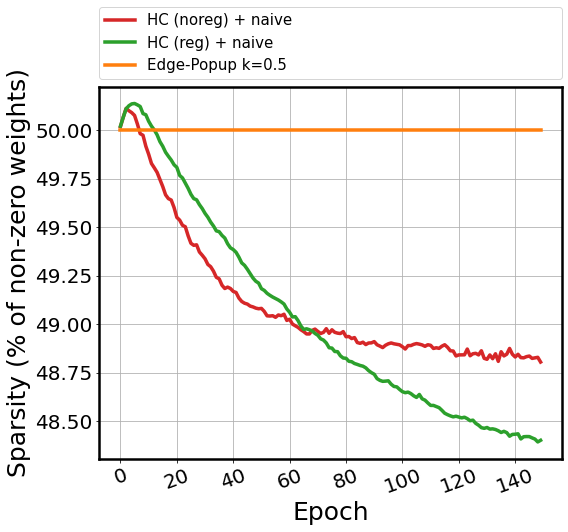

In [35]:
fig = plt.figure(figsize=(20, 26))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 7.5))
ax = plt.subplot(111)
observation_window = 500

# sparsity

df_hc[:observation_window].plot(x='epoch', y='model_sparsity', linestyle='-',
                              ax=ax, linewidth=3.5, color="C3", markersize=20, markevery=1,
                              label=r"HC (noreg) + naive")
df_hc_reg[:observation_window].plot(x='epoch', y='model_sparsity', linestyle='-',
                              ax=ax, linewidth=3.5, color="C2", markersize=20, markevery=1,
                              label=r"HC (reg) + naive")

df_ep3[:observation_window].plot(x='epoch', y='model_sparsity', linestyle='-',
                              ax=ax, linewidth=3.5, color="C1", markersize=20, markevery=1,
                              label=r"Edge-Popup k=0.5")



# df_ep[:observation_window].plot(x='epoch', y='model_sparsity', linestyle='-',
#                               ax=ax, linewidth=3.5, color="C1", markersize=20, markevery=1,
#                               label=r"Edge-Popup k=0.5")

# df_greedy[:observation_window].plot(x='epoch', y='model_sparsity', linestyle='-',
#                               ax=ax, linewidth=3.5, color="C2", markersize=20, markevery=1,
#                               label=r"Greedy Algo")

# df_hc_noreg[:observation_window].plot(x='epoch', y='model_sparsity', linestyle='-',
#                               ax=ax, linewidth=3.5, color="C3", markersize=20, markevery=1,
#                               label=r"HC (noreg) Algo")


# df_pt_hacky[:observation_window].plot(x='epoch', y='model_sparsity', linestyle='-',
#                               ax=ax, linewidth=3.5, color="C4", markersize=20, markevery=1,
#                               label=r"PT Hacky")

# df_pt_noreg[:observation_window].plot(x='epoch', y='model_sparsity', linestyle='-',
#                               ax=ax, linewidth=3.5, color="C5", markersize=20, markevery=1,
#                               label=r"PT No regularization")

# df_pt_reg[:observation_window].plot(x='epoch', y='model_sparsity', linestyle='-',
#                               ax=ax, linewidth=3.5, color="C6", markersize=20, markevery=1,
#                               label=r"PT with regularization")


# df_hc_reg[:observation_window].plot(x='epoch', y='model_sparsity', linestyle='-',
#                               ax=ax, linewidth=3.5, color="C7", markersize=20, markevery=1,
#                               label=r"HC (reg) Algo")



plt.xlabel("Epoch",fontsize=25)
plt.ylabel("Sparsity (% of non-zero weights)",fontsize=25)
plt.xticks(size=20, rotation=20)
plt.yticks(size=20)
#plt.ylim(60, 90)
#plt.xlim(-1, 80)
legend_properties = {'size':15}
ax.xaxis.get_offset_text().set_fontsize(15)
ax.xaxis.get_offset_text().set_weight('bold')
#ax.legend(prop=legend_properties)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop=legend_properties)
plt.grid()
plt.tight_layout()
plt.savefig("pruning_sparsity_comparison_cifar.pdf", format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.05)

## Sharpness  (2D)

In [ ]:
num_epoch=30

In [ ]:
size = np.load('results/CIFAR10_HC_{}epoch/results_2D_visualize_sharpness_sparsity_0.2_d_10_v_10_pruning_CIFAR10_hc_0.npy'.format(num_epoch)).shape

sparsity_hc_2D = np.zeros(size)
for idx in range(10):
    curr = np.load('results/CIFAR10_HC_{}epoch/results_2D_visualize_sharpness_sparsity_0.2_d_10_v_10_pruning_CIFAR10_hc_{}.npy'.format(num_epoch, idx))
    sparsity_hc_2D += curr
    #break
sparsity_hc_2D /= 10


In [ ]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [ ]:
delta = 0.01
x = np.arange(0.0, 0.2, delta)
y = np.arange(0.0, 0.2, delta)
X, Y = np.meshgrid(x, y)
Z = sparsity_hc_2D

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
plt.axis('square')
if num_epoch == 30:
    ax.set_title('Loss near the supermask of HC (30 epoch, 81.77%)', fontsize=14)
elif num_epoch == 150:
    ax.set_title('Loss near the supermask of HC (150 epoch, 85.35%)', fontsize=14)

plt.xlabel('hamming distance (along d1)', fontsize=14)
plt.ylabel('hamming distance (along d2)', fontsize=14)

In [ ]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt


delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Simplest default with labels')

## Sharpness (1D), Hypercube

In [ ]:
#df_sparsity_hc = pd.read_csv("results/CIFAR10_HC_150epoch/results_visualize_sharpness_pruning_CIFAR10_hc.csv")
#df_sparsity_hc = pd.read_csv("results/CIFAR10_HC_150epoch/results_visualize_sharpness_sparsity1_0.2_d1_100_v_10_pruning_CIFAR10_hc.csv")
#df_sparsity_hc = pd.read_csv("results/CIFAR10_HC_150epoch_connectivity/results_visualize_connectivity_d_1_v_1_pruning_CIFAR10_hc.csv")
df_sparsity_hc = pd.read_csv("results/CIFAR10_HC_150epoch_connectivity/results_visualize_connectivity_d_1_v_5_pruning_CIFAR10_hc.csv")
#df_sparsity_hc = pd.read_csv("results/CIFAR10_WeightTraining_100epoch_connectivity/results_visualize_connectivity_d_1_v_5_weight_training_CIFAR10_training.csv")
df_sparsity_hc


In [ ]:
fig = plt.figure(figsize=(20, 26))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

t = df_sparsity_hc['dist'] 
loss_mean, loss_std = df_sparsity_hc['train_loss_mean'], df_sparsity_hc['train_loss_std']
acc_mean, acc_std = df_sparsity_hc['test_acc_mean'], df_sparsity_hc['test_acc_std']

fig, ax1 = plt.subplots()
plt.xticks(size=14, rotation=20)
color = 'lightcoral'#'tab:red'
ax1.set_xlabel('Normalized hamming distance', fontsize = 16)
ax1.set_ylabel('Train loss', color=color, fontsize = 16)
ax1.plot(t, loss_mean, color=color)
plt.fill_between(t, loss_mean-loss_std, loss_mean+loss_std, color='mistyrose')
ax1.tick_params(axis='y', labelcolor=color, labelsize = 14)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'cornflowerblue' #'tab:blue'
ax2.set_ylabel('Test acc (%)', color=color, fontsize = 16)  # we already handled the x-label with ax1
ax2.plot(t, acc_mean, color=color)
plt.fill_between(t, acc_mean-acc_std, acc_mean+acc_std, color='lightsteelblue') #plt.title('MNIST, LeNet-5, Random weight switching', fontsize=fontsize) #plt.errorbar(dist_list*100, err_stat[:,0], err_stat[:,1])
ax2.tick_params(axis='y', labelcolor=color, labelsize = 14)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Mode connectivity of two Hypercube models in CIFAR-10', fontsize=16)
#plt.title('Mode connectivity of two Weight-trained models in CIFAR-10', fontsize=16)
plt.savefig("1D_visualizing_mode_connectivity_cifar_hc.pdf", format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.05)

## Sharpness (1D), Weight Training & HyperCube (HC)

In [159]:
df_sparsity_hc = pd.read_csv("plots_and_results_arxiv/results_visualize_connectivity_d_1_v_1_resol_100_pruning_CIFAR10_hc_prob.csv")

In [160]:
df_sparsity_wt = pd.read_csv("results/CIFAR10_WeightTraining_100epoch_connectivity/results_visualize_connectivity_d_1_v_5_weight_training_CIFAR10_training_prob.csv")
df_sparsity_wt_lin = pd.read_csv("results/CIFAR10_WeightTraining_100epoch_connectivity/results_visualize_connectivity_d_1_v_1_weight_training_CIFAR10_training_linear.csv")
#df_sparsity_hc = pd.read_csv("results/CIFAR10_HC_150epoch_connectivity/results_visualize_connectivity_d_1_v_5_pruning_CIFAR10_hc_prob.csv")

In [249]:
df_sparsity_hc

,dist,train_loss_mean,train_loss_std,train_acc_mean,train_acc_std,test_acc_mean,test_acc_std
0,0.0000,0.305506,0.0,90.016,0.0,84.84,0.0
1,0.0044,0.308835,0.0,89.752,0.0,84.35,0.0
2,0.0087,0.345419,0.0,89.030,0.0,84.18,0.0
3,0.0131,0.337518,0.0,89.166,0.0,84.12,0.0
4,0.0174,0.362603,0.0,88.264,0.0,83.61,0.0
...,...,...,...,...,...,...,...
96,0.4176,0.423340,0.0,86.524,0.0,83.28,0.0
97,0.4220,0.370367,0.0,87.534,0.0,84.06,0.0
98,0.4263,0.356667,0.0,87.492,0.0,84.26,0.0
99,0.4307,0.329636,0.0,87.906,0.0,84.35,0.0


In [ ]:
fig = plt.figure(figsize=(20, 26))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

t = df_sparsity_wt['dist'] 
#loss_mean_wt, loss_std_wt = df_sparsity_wt['train_loss_mean'], df_sparsity_wt['train_loss_std']
acc_mean_wt, acc_std_wt = df_sparsity_wt['test_acc_mean'], df_sparsity_wt['test_acc_std']
acc_mean_wt_lin, acc_std_wt_lin = df_sparsity_wt_lin['test_acc_mean'], df_sparsity_wt_lin['test_acc_std']
acc_mean_hc, acc_std_hc = df_sparsity_hc['test_acc_mean'], df_sparsity_hc['test_acc_std']

train_acc_mean_wt, train_acc_std_wt = df_sparsity_wt['train_acc_mean'], df_sparsity_wt['train_acc_std']
train_acc_mean_wt_lin, train_acc_std_wt_lin = df_sparsity_wt_lin['train_acc_mean'], df_sparsity_wt_lin['train_acc_std']
train_acc_mean_hc, train_acc_std_hc = df_sparsity_hc['train_acc_mean'], df_sparsity_hc['train_acc_std']



#fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()
plt.xticks(size=14, rotation=20)
'''
color = 'lightcoral'#'tab:red'
ax1.set_xlabel('Normalized hamming distance', fontsize = 16)
ax1.set_ylabel('Train loss', color=color, fontsize = 16)
ax1.plot(t, loss_mean, color=color)
plt.fill_between(t, loss_mean-loss_std, loss_mean+loss_std, color='mistyrose')
ax1.tick_params(axis='y', labelcolor=color, labelsize = 14)
'''
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Test/Train acc (%)', fontsize = 16)  # we already handled the x-label with ax1

color = 'cornflowerblue' #'tab:blue'
ax2.plot(t, acc_mean_wt, color=color)
#plt.fill_between(t, acc_mean_wt-acc_std_wt, acc_mean_wt+acc_std_wt, color='lightsteelblue') #plt.title('MNIST, LeNet-5, Random weight switching', fontsize=fontsize) #plt.errorbar(dist_list*100, err_stat[:,0], err_stat[:,1])

ax2.plot(t, train_acc_mean_wt, '--', color=color)

color = 'tab:green'
ax2.plot(t, acc_mean_wt_lin, color=color)
#plt.fill_between(t, acc_mean_wt_lin-acc_std_wt_lin, acc_mean_wt_lin+acc_std_wt_lin, color='tab:green') #plt.title('MNIST, LeNet-5, Random weight switching', fontsize=fontsize) #plt.errorbar(dist_list*100, err_stat[:,0], err_stat[:,1])

ax2.plot(t, train_acc_mean_wt_lin, '--', color=color)


color = 'lightcoral' #'tab:blue'
ax2.plot(t, acc_mean_hc, color=color)
#plt.fill_between(t, acc_mean_hc-acc_std_hc, acc_mean_hc+acc_std_hc, color='mistyrose') #plt.title('MNIST, LeNet-5, Random weight switching', fontsize=fontsize) #plt.errorbar(dist_list*100, err_stat[:,0], err_stat[:,1])

ax2.plot(t, train_acc_mean_hc, '--', color=color)


ax2.tick_params(axis='y', labelsize = 14)
ax2.legend(['Adam, prob. (test)', 'Adam, prob. (train)', 'Adam, linear (test)', 'Adam, linear (train)', 'HC, prob. (test)', 'HC, prob. (train)'])




fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Interpolating two good models in CIFAR-10', fontsize=16)
plt.savefig("1D_visualizing_mode_connectivity_cifar_adam_hc.pdf", format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.05)

<Figure size 1440x1872 with 0 Axes>

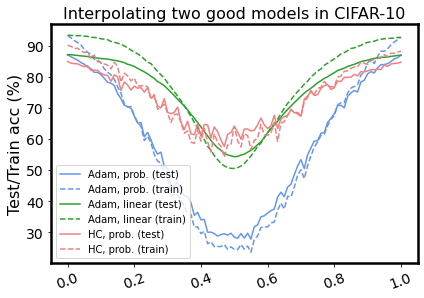

In [162]:
fig = plt.figure(figsize=(20, 26))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

t = df_sparsity_wt['dist'] 
#loss_mean_wt, loss_std_wt = df_sparsity_wt['train_loss_mean'], df_sparsity_wt['train_loss_std']
acc_mean_wt, acc_std_wt = df_sparsity_wt['test_acc_mean'], df_sparsity_wt['test_acc_std']
acc_mean_wt_lin, acc_std_wt_lin = df_sparsity_wt_lin['test_acc_mean'], df_sparsity_wt_lin['test_acc_std']
acc_mean_hc, acc_std_hc = df_sparsity_hc['test_acc_mean'], df_sparsity_hc['test_acc_std']

train_acc_mean_wt, train_acc_std_wt = df_sparsity_wt['train_acc_mean'], df_sparsity_wt['train_acc_std']
train_acc_mean_wt_lin, train_acc_std_wt_lin = df_sparsity_wt_lin['train_acc_mean'], df_sparsity_wt_lin['train_acc_std']
train_acc_mean_hc, train_acc_std_hc = df_sparsity_hc['train_acc_mean'], df_sparsity_hc['train_acc_std']



#fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()
plt.xticks(size=14, rotation=20)
'''
color = 'lightcoral'#'tab:red'
ax1.set_xlabel('Normalized hamming distance', fontsize = 16)
ax1.set_ylabel('Train loss', color=color, fontsize = 16)
ax1.plot(t, loss_mean, color=color)
plt.fill_between(t, loss_mean-loss_std, loss_mean+loss_std, color='mistyrose')
ax1.tick_params(axis='y', labelcolor=color, labelsize = 14)
'''
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Test/Train acc (%)', fontsize = 16)  # we already handled the x-label with ax1

color = 'cornflowerblue' #'tab:blue'
ax2.plot(t, acc_mean_wt, color=color)
#plt.fill_between(t, acc_mean_wt-acc_std_wt, acc_mean_wt+acc_std_wt, color='lightsteelblue') #plt.title('MNIST, LeNet-5, Random weight switching', fontsize=fontsize) #plt.errorbar(dist_list*100, err_stat[:,0], err_stat[:,1])

ax2.plot(t, train_acc_mean_wt, '--', color=color)

color = 'tab:green'
ax2.plot(t, acc_mean_wt_lin, color=color)
#plt.fill_between(t, acc_mean_wt_lin-acc_std_wt_lin, acc_mean_wt_lin+acc_std_wt_lin, color='tab:green') #plt.title('MNIST, LeNet-5, Random weight switching', fontsize=fontsize) #plt.errorbar(dist_list*100, err_stat[:,0], err_stat[:,1])

ax2.plot(t, train_acc_mean_wt_lin, '--', color=color)


color = 'lightcoral' #'tab:blue'
ax2.plot(t, acc_mean_hc, color=color)
#plt.fill_between(t, acc_mean_hc-acc_std_hc, acc_mean_hc+acc_std_hc, color='mistyrose') #plt.title('MNIST, LeNet-5, Random weight switching', fontsize=fontsize) #plt.errorbar(dist_list*100, err_stat[:,0], err_stat[:,1])

ax2.plot(t, train_acc_mean_hc, '--', color=color)


ax2.tick_params(axis='y', labelsize = 14)
ax2.legend(['Adam, prob. (test)', 'Adam, prob. (train)', 'Adam, linear (test)', 'Adam, linear (train)', 'HC, prob. (test)', 'HC, prob. (train)'])




fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Interpolating two good models in CIFAR-10', fontsize=16)
plt.savefig("1D_visualizing_mode_connectivity_cifar_adam_hc.pdf", format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.05)

## Sharpness (1D), HyperCube (HC) -- old


In [ ]:
#df_sparsity_hc = pd.read_csv("results/CIFAR10_HC_150epoch/results_visualize_sharpness_pruning_CIFAR10_hc.csv")
#df_sparsity_hc = pd.read_csv("results/CIFAR10_HC_150epoch/results_visualize_sharpness_sparsity1_0.2_d1_100_v_10_pruning_CIFAR10_hc.csv")
df_sparsity_hc = pd.read_csv("results/CIFAR10_HC_150epoch_connectivity/results_visualize_connectivity_d_1_v_1_pruning_CIFAR10_hc.csv")


#df_sparsity_hc['batch_train_loss_avg'] = df_sparsity_hc.iloc[:, 1:].mean(axis=1)


fig = plt.figure(figsize=(20, 26))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


fig = plt.figure(figsize=(8, 7.5))
ax = plt.subplot(111)
observation_window = 1000

# test acc
df_sparsity_hc[:observation_window].plot(x='dist', y='batch_train_loss', linestyle='-',
                              ax=ax, linewidth=3.5, color="C0", markersize=20, markevery=1,
                              label=r"Hypercube (83.95% and 84.82% accuracy in cifar-10)")#, title='averaged (100 directions, 10 samples)')



plt.xlabel("Normalized hamming distance",fontsize=25)
plt.ylabel("Train loss",fontsize=25)
plt.xticks(size=20, rotation=20)
plt.yticks(size=20)
#plt.ylim(60, 90)
#plt.xlim(-1, 80)
legend_properties = {'size':15}
ax.xaxis.get_offset_text().set_fontsize(15)
ax.xaxis.get_offset_text().set_weight('bold')
#ax.legend(prop=legend_properties)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop=legend_properties)
plt.grid()
plt.tight_layout()
plt.savefig("1D_visualizing_mode_connectivity_cifar_hc.pdf", format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.05)